# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Monday, 08.06.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you five projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2019 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to your tutor.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2017-2019. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

### Task 1 Solution:

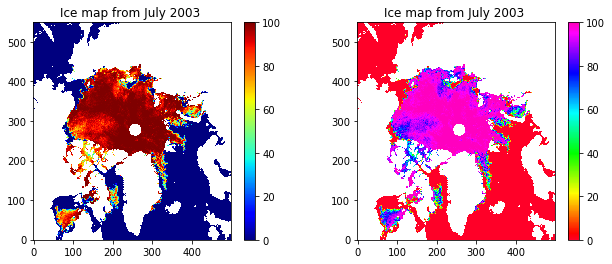

In [75]:
import numpy as np # importing the numpy module
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm


data = np.load('/home/shared/Project_2/ice_data/20030701.npy') # command to read the maps in the folder ice_data as numpy array. the data for 15th of july 2007 is taken as reference
data1 = np.load('/home/shared/Project_2/ice_data/20031201.npy')# 1st of  november as reference
#cmap = plt.cm.vidris # define the colourmap using cmap as jet
 # imshow= display image, i.e. data on a 2D regular raster


plt.subplot(1, 2, 1)
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=None, hspace=None)
plt.imshow(data, origin='lower', cmap=plt.cm.jet) #i use the colormap jet
plt.title('Ice map from July 2003 ')
#plt.axis('off'), command to remove x-axis and y axis ticks
plt.colorbar(fraction=0.05, pad=0.05) #command to show colorbar. Also the colorbar indicate area occupied by a corresponding pixel that is covered with ice.


plt.subplot(1, 2, 2)
plt.imshow(data, origin='lower', cmap=plt.cm.gist_rainbow)# i use the colormap gist_rainbow
plt.title('Ice map from July 2003 ')
#plt.axis('off')
plt.colorbar(fraction=0.05, pad=0.05)


plt.show()

#### Same icemap with different colourmaps

### Task 2 solution: 

In [76]:
import glob # The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.
import ice_data # impoting the ice data file provided

directory= glob.glob('/home/shared/Project_2/ice_data/*.npy') # contains all the ice maps
directory.sort() # since glob module returns results in arbitrary order, sort fuction is used to sort it out in proper orderi.e. in time/ filename

times=[] #we define times as an empty array

for file in directory:# start of the loop to read all the ice map data
    data= np.load(file) # read the data into variable
    p= file[len(file)-12:] # p will then read the last 12 characters of the name of file in directory
    year=float(p[0:4])# slicing is used to extract year from p 
    month=float(p[4:6])# slicing is used to extract month from p
    day=float(p[6:8])# slicing is used to extract day from p
    d=int(day)-1 # we do this so that 1st of january is taken as 2003.00
    m = int(month)-1
    t = year + m/12 + d/360 # t is the individual fractional time in terms of year which will be looped over . Assumption: each month has 30 days and each year has 360 days
    times = np.append(times,t)# the times array is essentially the fractional time in years
    
print(times)    
    

    
    

[2003.         2003.03888889 2003.08333333 2003.12222222 2003.16666667
 2003.20555556 2003.25       2003.28888889 2003.33333333 2003.37222222
 2003.41666667 2003.45555556 2003.5        2003.53888889 2003.58333333
 2003.62222222 2003.66666667 2003.70555556 2003.75       2003.78888889
 2003.87222222 2003.91666667 2003.95555556 2004.         2004.03888889
 2004.08333333 2004.12222222 2004.16666667 2004.20555556 2004.25
 2004.28888889 2004.33333333 2004.37222222 2004.41666667 2004.45555556
 2004.5        2004.53888889 2004.58333333 2004.62222222 2004.66666667
 2004.70555556 2004.75       2004.78888889 2004.83333333 2004.87222222
 2004.91666667 2004.95555556 2005.         2005.03888889 2005.08333333
 2005.12222222 2005.16666667 2005.20555556 2005.25       2005.28888889
 2005.33333333 2005.37222222 2005.41666667 2005.45555556 2005.5
 2005.53888889 2005.58333333 2005.62222222 2005.66666667 2005.70555556
 2005.75       2005.78888889 2005.83333333 2005.87222222 2005.91666667
 2005.95555556 2006

#### Now I plot the no. of pixels with concentration of ice>=50% with time

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Total no. of pixels over 50% ice vs Time')

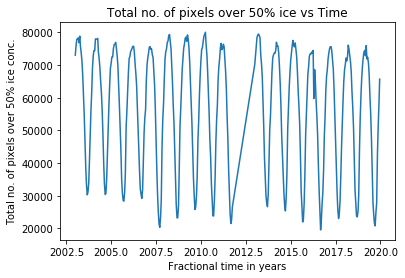

In [77]:
import glob
directory= glob.glob('/home/shared/Project_2/ice_data/*.npy') # contains all the ice maps
directory.sort() # since glob module returns results in arbitrary order, sort fuction is used to sort it out in proper orderi.e. in time/ filename

d=[]
n=0
for file in directory: #loop for reading all files 
    #print(filename)
    data = np.load(file)
    
    #print(data)
    c=[]
    for a in data:  #start of the loop to calculate no. of pixels over 50% concentration of ice. a are the pixels in data
        #print(a)
        b=a[a>=50] # here I define 'b' as all those pixels with concentration of ice greater then or equal to 50%
        #print(b)
        c=np.append(c,len(b)) # to convert all the values of b into an array I use append
    #print(np.sum(c))
    s = np.sum(c)    # since I need total number of pixels , I sum over all the elements in respective arrays in c
    #print(c)
    d = np.append(d,s)# convert all the total number of pixel for each date into an array
#print(d)    
plt.plot(times, d) # finally I plot the total number of pixels with 50% or more concentration of ice with time
plt.xlabel('Fractional time in years')
plt.ylabel('Total no. of pixels over 50% ice conc.')
plt.title('Total no. of pixels over 50% ice vs Time')

### From the plot , the no. of pixels vary with peaks for winter and dips for summer

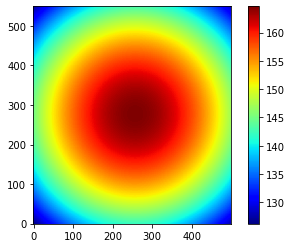

In [78]:
area = np.load('/home/shared/Project_2/ice_data_area.npy')# I load the ice_data_area file provided
cmap = plt.cm.jet
plt.imshow(area,  origin='lower', cmap=cmap)
plt.colorbar() #a plot (with colorbar) to see how the pixel area is changing over the image

###  code which is much faster to calculate the total area covered by ice

Text(0.5, 1.0, 'Total area v/s time')

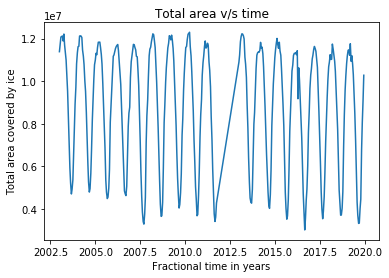

In [79]:
import re
import glob
import numpy as np
n=0
ax=[]
s=0
directory= glob.glob('/home/shared/Project_2/ice_data/20*.npy')
directory.sort()
area = np.load('/home/shared/Project_2/ice_data_area.npy')

for filename in directory: #loop for reading all files 
    #print(filename)
    data = np.load(filename)
    a=np.multiply(area, data)
    a=a/100
    tot=np.nansum(a)
    #print(area[a].sum())
    ax=np.append(ax, tot.sum())
    #n+=1
#print(ax)
plt.plot(times, ax)
 # finally I plot the total number of pixels with 50% or more concentration of ice with time
plt.xlabel('Fractional time in years')
plt.ylabel('Total area covered by ice')
plt.title('Total area v/s time')

### From above figure we see that the minimum is the least for the year 2016 followed by 2007 and 2011. In general the pattern is something like: from 2003-2007 there is a decreasing pattern, from 2007-2010 it increases, 2010-2012 it decreases, 2012-2014 it increases, 2014-2016 it increases, 2016-2018 it decreases and finally increases.

### Code to find area with 99% or more concentration of ice

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater_equal
  app.launch_new_instance()


Text(0.5, 1.0, 'Area with above 99% ice v/s time')

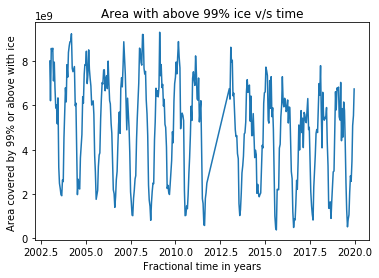

In [58]:
import re
import glob
import numpy as np
n=0
ax1=[]
s=0
directory= glob.glob('/home/shared/Project_2/ice_data/*.npy')
directory.sort()
area = np.load('/home/shared/Project_2/ice_data_area.npy')

for filename in directory: #loop for reading all files 
    #print(filename)
    data = np.load(filename)
    a=np.where(data>=99) # the condition is put such that we get only those values which are greater than or equal to 99 indication 99%or more concentration of ice
    #print(area[a].sum())
    b=area[np.argwhere(data>=99)].sum()
    c=np.multiply(b, a)
    tot=np.nansum(b)
    ax1=np.append(ax1, tot)
    #n+=1
#print(ax)
plt.plot(times, ax1)
plt.xlabel('Fractional time in years')
plt.ylabel('Area covered by 99% or above with ice ')
plt.title('Area with above 99% ice v/s time')

In [59]:
print(np.argmin(ax)) # argmin function give us the  indices of the minimum values along an axis.

298


In [60]:
print(ax[298])

3025369.210330964


In [80]:
print(ax[298], times[298]) # this prints the minimum value of area covered and the corresponding time (1st September 2016)

3025369.210330964 2016.6666666666667


### We see that the area of the region covered with ice is the smallest for 01/09/2016(dd/mm/yyyy) and the value of minimum area is 3025369.210330964 sq. kms

In [82]:
np.min(ax)

3025369.210330964

### I now plot the ice map for 1st of september.2016 along with 1st of September, 2003 side-by-side in order to comare the ice concentration change

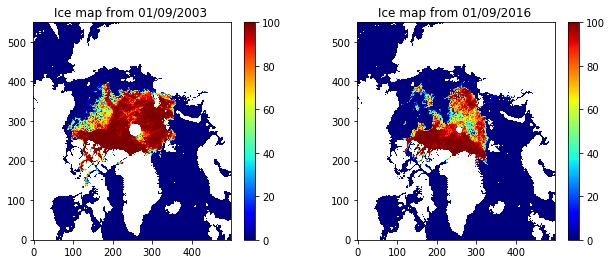

In [63]:
data = np.load('/home/shared/Project_2/ice_data/20030901.npy') # command to read the maps in the folder ice_data as numpy array. the data for 15th of july 2007 is taken as reference
data1 = np.load('/home/shared/Project_2/ice_data/20160901.npy')# 1st of  november as reference
#cmap = plt.cm.vidris # define the colourmap using cmap as jet
 # imshow= display image, i.e. data on a 2D regular raster


plt.subplot(1, 2, 1)
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=None, hspace=None)
plt.imshow(data, origin='lower', cmap=plt.cm.jet) #i use the colormap jet
plt.title('Ice map from 01/09/2003 ')
#plt.axis('off'), command to remove x-axis and y axis ticks
plt.colorbar(fraction=0.05, pad=0.05) #command to show colorbar. Also the colorbar indicate area occupied by a corresponding pixel that is covered with ice.


plt.subplot(1, 2, 2)
plt.imshow(data1, origin='lower', cmap=plt.cm.jet)# i use the colormap gist_rainbow
plt.title('Ice map from 01/09/2016 ')
#plt.axis('off')
plt.colorbar(fraction=0.05, pad=0.05)


plt.show()

In [64]:
a=np.subtract(data, data1)#ifference between the two maps to know about the loss in ice over time
print(a)

[[nan nan nan ...  0.  0.  0.]
 [nan nan nan ...  0.  0.  0.]
 [nan nan nan ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]
 [ 0.  0.  0. ... nan nan nan]]


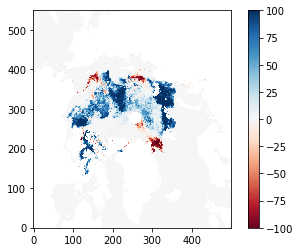

In [65]:
plt.imshow(a, origin='lower', cmap=plt.cm.RdBu)
plt.colorbar(fraction=0.05, pad=0.05)

### I calculated the difference between the two maps and plotted above such that a loss in ice over time corresponds to a negative value, and a gain in ice corresponds to a positive value.

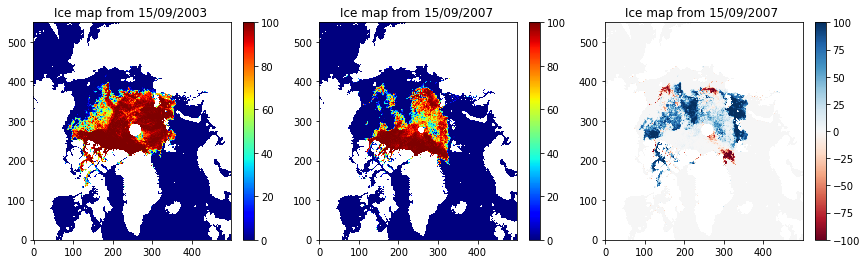

In [66]:
plt.subplot(1, 3, 1)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)
plt.imshow(data, origin='lower', cmap=plt.cm.jet) #i use the colormap jet
plt.title('Ice map from 15/09/2003 ')
#plt.axis('off'), command to remove x-axis and y axis ticks
plt.colorbar(fraction=0.05, pad=0.05) #command to show colorbar. Also the colorbar indicate area occupied by a corresponding pixel that is covered with ice.


plt.subplot(1, 3, 2)
plt.imshow(data1, origin='lower', cmap=plt.cm.jet)# i use the colormap gist_rainbow
plt.title('Ice map from 15/09/2007 ')
#plt.axis('off')
plt.colorbar(fraction=0.05, pad=0.05)

plt.subplot(1, 3, 3)
#plt.imshow(data1, origin='lower', cmap=plt.cm.jet)# i use the colormap gist_rainbow
plt.title('Ice map from 15/09/2007 ')
#plt.axis('off')
plt.imshow(a, origin='lower', cmap=plt.cm.RdBu)
plt.colorbar(fraction=0.05, pad=0.05)



plt.show()

In [102]:


%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt

area = np.load('/home/shared/Project_2/ice_data_area.npy')


i = 0
ax = []
y1 = np.arange(2004,2007,1) # First range of year (1-D array)
y2 = np.arange(2017,2020,1)# Second range of year (1-D array)
n = []
times =[]
for i in range(len(y1)):
    directory_1 = glob.glob('/home/shared/Project_2/ice_data/'+ str(y1[i]) + '*.npy')# This is to define year as a variable
    n = np.append(n,directory_1)
n.sort()
#print(n)

for filename in n:
   
    data = np.load(filename)
    #print(filename)
    a = np.multiply(area,data)
    a = a/100
    tot = np.nansum(a)
    ax = np.append(ax, tot.sum())

y = ax.reshape(24,3) # areas of ice coverage for the years 2003, 2004 and 2005 in a 2-D array
#print(y)
mean= np.mean(y, axis = 1) #mean of the ice coverage area for each date
print(mean,len(mean)) 
min_2004=np.min(y)
   
#x = np.mean(ax)
#print(x)
#print(x, times[x])    
#plt.plot(times,ax)  
#print(i)
#plt.plot(times,mean_1)

[11529258.61942654 12121302.85973117 11563132.02272986 10104753.4541167
  7385097.67147764  5012626.00970366  6880692.31644894  9971485.80046261
 11181921.45608668 11744955.92723961 11563151.79021167  9888600.40520218
  6714465.6802589   4617086.35942569  6312025.54473781  9672578.17797642
 11265022.66687046 11614518.10055548 11333428.66934253  9718324.78995766
  6699799.62125619  4734526.18448762  6419725.49976996  9151353.10480067] 24


In [103]:
# Calculating the times array

import re
directory= glob.glob('/home/shared/Project_2/ice_data/2004*.npy')
directory.sort()

times = ([])
for filename in directory: #loop for reading all files
    #print(filename)
    data= np.load(filename)

    file= filename[len(filename)-12:]
    #print(file)
    year=float(file[0:4])
    month=float(file[4:6])
    day=float(file[6:8])
    d=int(day)-1
    m = int(month)-1
   
    t = m/12 + d/360 
    times = np.append(times,t)
    
    
    
        
print(times)
    #print(day)

[0.         0.03888889 0.08333333 0.12222222 0.16666667 0.20555556
 0.25       0.28888889 0.33333333 0.37222222 0.41666667 0.45555556
 0.5        0.53888889 0.58333333 0.62222222 0.66666667 0.70555556
 0.75       0.78888889 0.83333333 0.87222222 0.91666667 0.95555556]


4617086.359425689


Text(0.5, 1.0, 'Total Area covered with ice for 2004-2006')

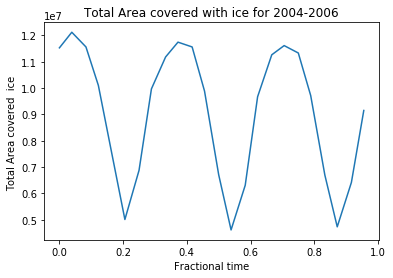

In [104]:
plt.plot(times, mean)
print(np.min(mean))
plt.xlabel('Fractional time')
plt.ylabel('Total Area covered  ice ')
plt.title('Total Area covered with ice for 2004-2006')

In [105]:
#for year 2017-2019


area = np.load('/home/shared/Project_2/ice_data_area.npy')


i = 0
ax = []
y1 = np.arange(2004,2007,1)
y2 = np.arange(2017,2020,1)
n2 = []
times =[]
for i in range(len(y2)):
    directory_2 = glob.glob('/home/shared/Project_2/ice_data/'+ str(y2[i]) + '*.npy') 
    n2 = np.append(n2,directory_2)
n2.sort()
#print(n)

for filename in n2:
   
    data = np.load(filename)
    #print(filename)
    a = np.multiply(area,data)
    a = a/100
    tot = np.nansum(a)
    ax = np.append(ax, tot.sum())

y2 = ax.reshape(24,3)
#print(y)
mean2= np.mean(y2, axis = 1)
print(mean2,len(mean2))
min_2019=np.min(y2)

[10639102.89297607 11450472.44721715 11314415.87940695  9616143.97073026
  6138485.25152323  3818997.63550114  5814073.16308936  9159878.7470873
 10939371.49782514 11264224.91502984 11222546.77748417  9580013.19925836
  6347122.02511297  3923922.27184543  5271763.73755951  9420270.20267966
 11158970.23523127 11482782.73654746 10979697.22603856  9389338.48004008
  5773288.62251118  3461713.30603166  5094075.58822523  9157531.09102958] 24


[0.         0.03888889 0.08333333 0.12222222 0.16666667 0.20555556
 0.25       0.28888889 0.33333333 0.37222222 0.41666667 0.45555556
 0.5        0.53888889 0.58333333 0.62222222 0.66666667 0.70555556
 0.75       0.78888889 0.83333333 0.87222222 0.91666667 0.95555556]


Text(0.5, 1.0, 'Total Area covered with ice for 2017-2019')

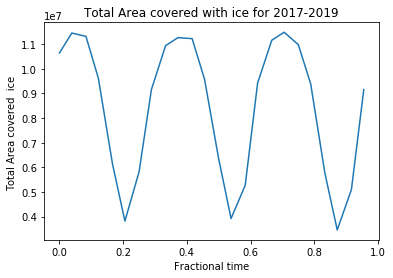

In [106]:
import re
directory= glob.glob('/home/shared/Project_2/ice_data/2004*.npy')
directory.sort()

times = ([])
for filename in directory: #loop for reading all files
    #print(filename)
    data= np.load(filename)

    file= filename[len(filename)-12:]
    #print(file)
    year=float(file[0:4])
    month=float(file[4:6])
    day=float(file[6:8])
    d=int(day)-1
    m = int(month)-1
   
    t = m/12 + d/360 
    times = np.append(times,t)
    
    
    
        
print(times)
    #print(day)
plt.plot(times, mean2)
plt.xlabel('Fractional time')
plt.ylabel('Total Area covered  ice ')
plt.title('Total Area covered with ice for 2017-2019')

In [108]:
Difference= np.subtract(min_2004_2006, min_2017_2019)
print(Difference)

1165422.8816574235


### So we subtract the minimun area covered by ice in the year range 2017-2019 from the minimun area covered by ice in the year range 2004-2006 to get an over all loss of ice concentration to be 1165422.8816574235 sq. kms  